## Mobile Price Range Classification

### Problem Statement:
Market size of mobile phones if growing everyday and so is the competition.To capture the maximum market electronics companies try to make improvements in their products. However, sales of mobile phones depend on various factors like demand, technology, marketing, brand, availability, user experience, service, price, etc. As we understand that selling price makes a huge difference when it comes to sales and profits. Estimating an optimal price for a new mobile phone can be a tricky task especially when you are new in the business or when you want to launch a new kind of mobile phone in the market.

As part of this exercise we will try to estimate the price range for a given mobile phone using given feature information. These details are collected from various similar companies.

### Attribute Information
id : ID

battery_power : Total energy a battery can store in one time measured in mAh

blue : Has bluetooth or not

clock_speed : speed at which microprocessor executes instructions

dual_sim : Has dual sim support or not

fc : Front Camera megapixels

four_g : Has 4G or not

int_memory : Internal Memory in Gigabytes

m_dep : Mobile Depth in cm

mobile_wt : Weight of mobile phone

n_cores : Number of cores of processor

pc : Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h : Screen Height of mobile in cm

sc_w : Screen Width of mobile in cm

talk_time : longest time that a single battery charge will last when you are

three_g : Has 3G or not

touch_screen : Has touch screen or not

wifi : Has wifi or not

price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Import Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score,classification_report, plot_confusion_matrix

In [3]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

## Setting options

In [4]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

### Read data

In [6]:
data=pd.read_csv('3. Mobile.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2000000,0,1,0,7,0.6000000,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5000000,1,0,1,53,0.7000000,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5000000,1,2,1,41,0.9000000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5000000,0,0,0,10,0.8000000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2000000,0,13,1,44,0.6000000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## Data Analysis & Preparation

Data preparation is the process of cleaning and transforming raw data prior to building predictive models.

Here we will analyze and prepare data to perform regression techniques:

1.Check dimensions of the dataframe in terms of rows and columns

2.Check data types. Ensure your data types are correct. Refer data definitions to validate

3.If data types are not as per business definition, change the data types as per requirement

4.Study summary statistics

5.Check for missing values

6.Study correlation

7.Detect outliers

Note: it is an art to explore data and one will need more and more practice to gain expertise in this area

In [7]:
data.shape

(2000, 21)

In [8]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [11]:
pd.value_counts(data['price_range'])

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [12]:
pd.value_counts(data['wifi'])

1    1014
0     986
Name: wifi, dtype: int64

In [14]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000
mean,1238.5185000,0.4950000,1.5222500,0.5095000,4.3095000,0.5215000,32.0465000,0.5017500,140.2490000,4.5205000,9.9165000,645.1080000,1251.5155000,2124.2130000,12.3065000,5.7670000,11.0110000,0.7615000,0.5030000,0.5070000,1.5000000
std,439.4182061,0.5001000,0.8160042,0.5000348,4.3414437,0.4996625,18.1457150,0.2884155,35.3996549,2.2878367,6.0643149,443.7808108,432.1994469,1084.7320436,4.2132450,4.3563976,5.4639552,0.4262729,0.5001160,0.5000760,1.1183136
min,501.0000000,0.0000000,0.5000000,0.0000000,0.0000000,0.0000000,2.0000000,0.1000000,80.0000000,1.0000000,0.0000000,0.0000000,500.0000000,256.0000000,5.0000000,0.0000000,2.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,851.7500000,0.0000000,0.7000000,0.0000000,1.0000000,0.0000000,16.0000000,0.2000000,109.0000000,3.0000000,5.0000000,282.7500000,874.7500000,1207.5000000,9.0000000,2.0000000,6.0000000,1.0000000,0.0000000,0.0000000,0.7500000
50%,1226.0000000,0.0000000,1.5000000,1.0000000,3.0000000,1.0000000,32.0000000,0.5000000,141.0000000,4.0000000,10.0000000,564.0000000,1247.0000000,2146.5000000,12.0000000,5.0000000,11.0000000,1.0000000,1.0000000,1.0000000,1.5000000
75%,1615.2500000,1.0000000,2.2000000,1.0000000,7.0000000,1.0000000,48.0000000,0.8000000,170.0000000,7.0000000,15.0000000,947.2500000,1633.0000000,3064.5000000,16.0000000,9.0000000,16.0000000,1.0000000,1.0000000,1.0000000,2.2500000
max,1998.0000000,1.0000000,3.0000000,1.0000000,19.0000000,1.0000000,64.0000000,1.0000000,200.0000000,8.0000000,20.0000000,1960.0000000,1998.0000000,3998.0000000,19.0000000,18.0000000,20.0000000,1.0000000,1.0000000,1.0000000,3.0000000


In [15]:
#Missing Values

missing_values=data.isnull().sum()

In [16]:
print(missing_values)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [18]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.0000000,0.0112516,0.0114816,-0.0418468,0.0333344,0.0156646,-0.0040037,0.0340845,0.0018444,-0.0297273,0.0314407,0.0149008,-0.0084018,-0.0006529,-0.0299586,-0.0214209,0.0525104,0.0115222,-0.0105158,-0.0083429,0.2007226
blue,0.0112516,1.0000000,0.0214187,0.0351981,0.0035932,0.0134431,0.0411772,0.0040492,-0.0086046,0.0361607,-0.0099522,-0.0068724,-0.0415334,0.0263509,-0.0029523,0.0006131,0.0139337,-0.0302362,0.0100607,-0.0218632,0.0205729
clock_speed,0.0114816,0.0214187,1.0000000,-0.0013152,-0.0004339,-0.0430734,0.0065451,-0.0143644,0.0123497,-0.0057242,-0.0052450,-0.0145229,-0.0094757,0.0034430,-0.0290776,-0.0073784,-0.0114319,-0.0464335,0.0197558,-0.0244710,-0.0066057
dual_sim,-0.0418468,0.0351981,-0.0013152,1.0000000,-0.0291228,0.0031865,-0.0156790,-0.0221417,-0.0089794,-0.0246581,-0.0171426,-0.0208753,0.0142905,0.0410720,-0.0119493,-0.0166661,-0.0394040,-0.0140076,-0.0171174,0.0227403,0.0174445
fc,0.0333344,0.0035932,-0.0004339,-0.0291228,1.0000000,-0.0165597,-0.0291328,-0.0017911,0.0236180,-0.0133562,0.6445953,-0.0099899,-0.0051756,0.0150990,-0.0110140,-0.0123726,-0.0068286,0.0017926,-0.0148278,0.0200849,0.0219982
four_g,0.0156646,0.0134431,-0.0430734,0.0031865,-0.0165597,1.0000000,0.0086900,-0.0018233,-0.0165367,-0.0297055,-0.0055982,-0.0192362,0.0074482,0.0073135,0.0271655,0.0370050,-0.0466278,0.5842456,0.0167578,-0.0176200,0.0147717
int_memory,-0.0040037,0.0411772,0.0065451,-0.0156790,-0.0291328,0.0086900,1.0000000,0.0068858,-0.0342142,-0.0283104,-0.0332734,0.0104413,-0.0083349,0.0328132,0.0377711,0.0117305,-0.0027903,-0.0093660,-0.0269987,0.0069930,0.0444350
m_dep,0.0340845,0.0040492,-0.0143644,-0.0221417,-0.0017911,-0.0018233,0.0068858,1.0000000,0.0217561,-0.0035039,0.0262824,0.0252629,0.0235663,-0.0094341,-0.0253478,-0.0183881,0.0170026,-0.0120654,-0.0026375,-0.0283527,0.0008530
mobile_wt,0.0018444,-0.0086046,0.0123497,-0.0089794,0.0236180,-0.0165367,-0.0342142,0.0217561,1.0000000,-0.0189888,0.0188439,0.0009393,0.0000898,-0.0025805,-0.0338547,-0.0207605,0.0062085,0.0015506,-0.0143682,-0.0004094,-0.0303022
n_cores,-0.0297273,0.0361607,-0.0057242,-0.0246581,-0.0133562,-0.0297055,-0.0283104,-0.0035039,-0.0189888,1.0000000,-0.0011926,-0.0068721,0.0244799,0.0048683,-0.0003148,0.0258265,0.0131479,-0.0147327,0.0237742,-0.0099635,0.0043993


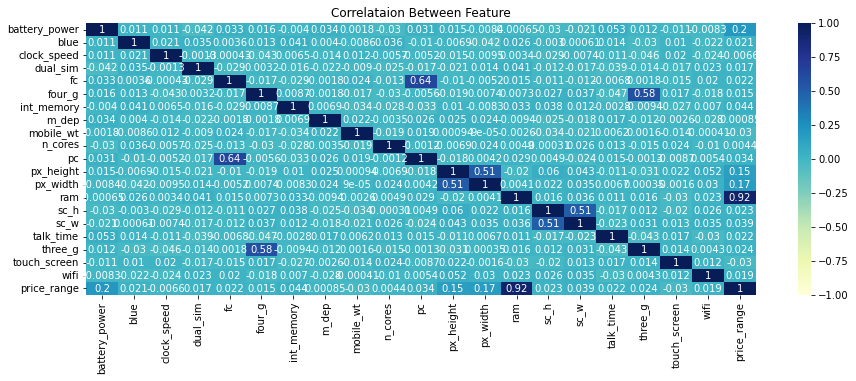

In [20]:
corr=data.corr()
plt.figure(figsize=(15,5))

sns.heatmap(corr, cmap='YlGnBu', vmax=1, vmin=-1, annot=True)

plt.title('Correlataion Between Feature')
plt.show()

In [21]:
# Frequency Count between Price range & Ram

pd.crosstab(data['ram'], data['price_range'])

price_range,0,1,2,3
ram,,,,
256,1,0,0,0
258,2,0,0,0
259,1,0,0,0
262,1,0,0,0
263,1,0,0,0
265,1,0,0,0
267,1,0,0,0
273,1,0,0,0
277,1,0,0,0


<AxesSubplot:>

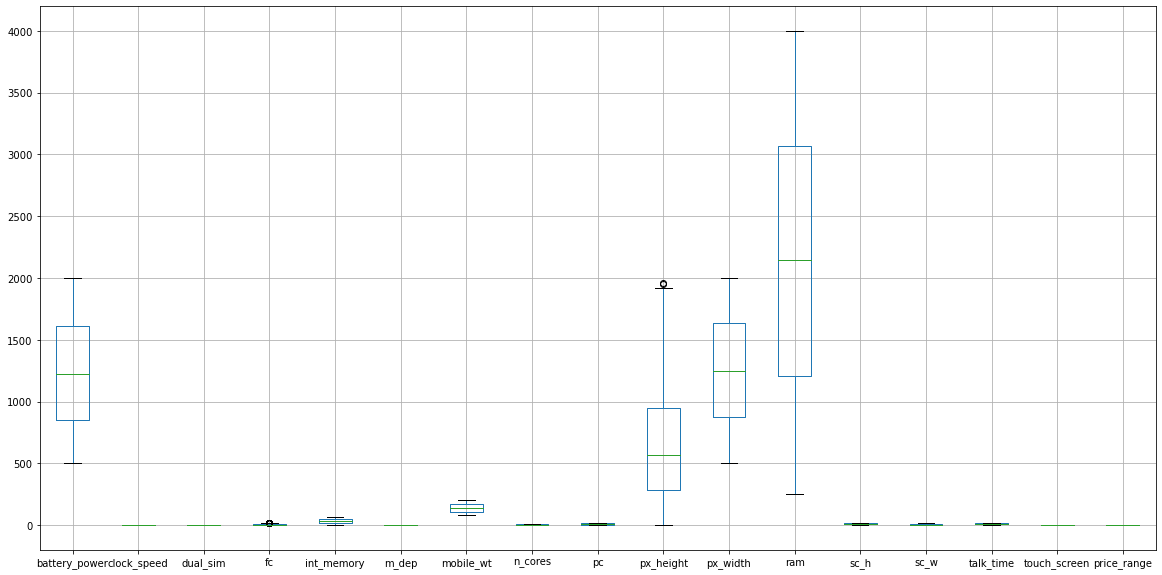

In [29]:
#finding the outliers using box plot

data.boxplot(column =['battery_power', 'clock_speed', 'dual_sim', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
       'touch_screen', 'price_range'], figsize=(20,10))

In [30]:
data['px_height'].describe()

count   2000.0000000
mean     645.1080000
std      443.7808108
min        0.0000000
25%      282.7500000
50%      564.0000000
75%      947.2500000
max     1960.0000000
Name: px_height, dtype: float64

## Logistic Regression

In [33]:
X=data.drop('price_range', axis=1)
Y=data['price_range']

In [37]:
# splitting data into training and testing sets

x_train,x_test, y_train, y_test=train_test_split(X,Y, test_size=0.30, random_state=42)

In [38]:
# checking the dimension of train & test subset

x_train.shape

(1400, 20)

In [39]:
x_test.shape

(600, 20)

In [40]:
X.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2000000,0,1,0,7,0.6000000,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5000000,1,0,1,53,0.7000000,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5000000,1,2,1,41,0.9000000,145,5,6,1263,1716,2603,11,2,9,1,1,0


In [41]:
# import logistic regression and train on training set

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [42]:
# predict the price range of the test data

y_pred=model.predict(x_test)

In [43]:
y_pred

array([0, 2, 0, 3, 1, 2, 2, 0, 3, 3, 0, 1, 2, 3, 2, 1, 2, 2, 1, 0, 0, 1,
       0, 2, 1, 1, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 2, 1, 3, 0, 1, 2, 3, 0,
       3, 3, 3, 1, 3, 1, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 3, 2, 2, 2, 0,
       3, 3, 1, 1, 2, 1, 0, 1, 2, 0, 0, 3, 1, 1, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 2, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 1,
       0, 0, 3, 3, 2, 1, 3, 3, 0, 2, 1, 3, 2, 2, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 3, 1, 3, 3, 0, 0, 1, 2, 1, 2, 3, 1, 1, 0,
       2, 3, 0, 1, 0, 1, 3, 3, 2, 2, 1, 0, 0, 2, 1, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 2, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 1, 2, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 2, 3, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 3, 2, 1, 0, 2, 3, 1, 3, 3,
       2, 3, 0, 3, 2, 2, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 2, 3, 0, 3, 3, 2, 2, 2, 0, 1, 2, 0, 2, 3, 1, 3, 1, 1, 3, 0, 3,
       0, 0, 3, 0, 1, 2, 3, 2, 2, 0, 1, 0, 0, 3, 3,

In [44]:
# lets measure the accuracy of the model

accuracy_score(y_test, y_pred)

0.635

In [45]:
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       151
           1       0.52      0.51      0.51       146
           2       0.51      0.53      0.52       148
           3       0.71      0.74      0.72       155

    accuracy                           0.64       600
   macro avg       0.64      0.63      0.63       600
weighted avg       0.64      0.64      0.64       600



<AxesSubplot:>

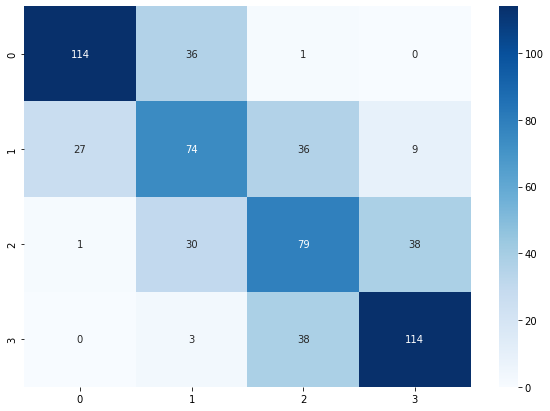

In [47]:
conf_mat= confusion_matrix(y_test, y_pred)
data_conf_mat=pd.DataFrame(conf_mat)
plt.figure(figsize=(10,7))
sns.heatmap(data_conf_mat, annot=True, cmap='Blues',fmt='g')